# 101068721

# Car pricing prediction data pre-processing and model evaluation

 In this notebook, the car price prediction dataset is preprocessed and evaluated using four models

###### Loading Data, general inspection
- Rearranging label column to the end
- Age column deduced from year column
- Datatype change of one of max_power column

###### Visualising the data 
- Histogram of numerical columns 
- Scatterplot of numerical columns and selling_price columns

 
###### Data cleaning 
- Removing columns with less than 1% of unique value
- Correlation matrix to see correlation between numerical columns
- Removing duplicate values
- Plotting boxplot graph for each numerical column
- Removing outliers 
- Finding missing values and imputing using mean 
- Checking outliers with LocalOutlierFactor 
- Resetting index value of dataset

###### Data transformation
- Normalisation 

###### Data Encoding 
- Label encoding name column 
- Ordial encoding owner column 
- One hot encoding of fuel, seller_type, transmission column
- Adding all the columns back to the dataset 

###### Data splitting
- Data split into test, train and validation set

###### Linear regression, KNN regression, Random forest regression, XGBoost regression
- Model training and evaluation on validation set
- Learning curve for train and validation set
- GridSearchCV for hyperparameter tuning and evaluation on validation set
- Model built on best parameters and evaluation on test set
- Predicted Vs Actual value scatter plot
- Residual Vs Fitted scatter plot 
- Understanding MSE score of XGBoost

###### Model comparison
- r2 value comparison 
- MSE comparison of all models  
- MAE comparison of all models 
- Residual histograms of all models

# Loading and inspecting data

Importing the libraries 

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from sklearn.impute import SimpleImputer

In [2]:
import warnings

# Removing warnings
warnings.filterwarnings("ignore")

Importing the dataset carPrices

In [3]:
data = pd.read_csv('carPrices.csv')

Checking the first five rows of the dataset

In [4]:
data.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage(km/ltr/kg),engine,max_power,seats
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.40,1248.0,74,5.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498.0,103.52,5.0
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.70,1497.0,78,5.0
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.00,1396.0,90,5.0
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.10,1298.0,88.2,5.0


Converting the year into age so as to simplify values and to make it easier for model

In [5]:
# Checking the current year 
current_year = datetime.now().year
# Changing the year to age
data['Age']= current_year - data['year'] 
# Dropping year column 
data.pop("year")

0       2014
1       2014
2       2006
3       2010
4       2007
        ... 
8123    2013
8124    2007
8125    2009
8126    2013
8127    2013
Name: year, Length: 8128, dtype: int64

In [6]:
#data["selling_price"] =data["selling_price"]/10000 

Renaming 'mileage(km/ltr/kg)'column to 'mileage' for ease of use 

In [7]:
data.rename(columns={"mileage(km/ltr/kg)": "mileage"}, inplace=True)

Reordering the dataset so that the label comes(selling price) in the end

In [8]:
# Popping the label out
label= data.pop("selling_price")
# Inserting the label back in the end of the dataset
data.insert(11,label.name,label)

Checking the number of rows and columns in the dataset.It shows that the dataset has 8128 rows and 11 features and 1 label column

In [9]:
data.shape

(8128, 12)

By checking the columns and value count we can see that the maximum number of cares are Maruti Swift Dzire VDI, and the maximum cars are made in 2017 and maximum number of cars use diesel as fuel and seller_type is Individual.

In [10]:
# Selecting the columns
columns= ["name",
          "selling_price",
          "km_driven",
          "fuel",
          "seller_type",
          "transmission",
          "owner",
          "mileage",
          "engine",
          "max_power",
          "Age"]

# For loop to see the value counts in each column
for i in columns:
    print(data[i].value_counts())

Maruti Swift Dzire VDI                             129
Maruti Alto 800 LXI                                 82
Maruti Alto LXi                                     71
BMW X4 M Sport X xDrive20d                          62
Maruti Swift VDI                                    61
                                                  ... 
Skoda Fabia 1.4 TDI Ambiente                         1
Mahindra Scorpio VLX 2WD AT BSIII                    1
Renault KWID Climber 1.0 AMT                         1
Mahindra XUV300 W8 Option Dual Tone Diesel BSIV      1
Toyota Innova 2.5 GX (Diesel) 8 Seater BS IV         1
Name: name, Length: 2058, dtype: int64
300000     227
600000     213
350000     209
550000     204
450000     195
          ... 
308000       1
3900000      1
2850000      1
39000        1
746000       1
Name: selling_price, Length: 679, dtype: int64
120000    536
70000     456
80000     448
60000     425
50000     391
         ... 
59635       1
123219      1
65300       1
39395       1
1910

Checking the datatype of each column 

In [11]:
data.dtypes

name              object
km_driven          int64
fuel              object
seller_type       object
transmission      object
owner             object
mileage          float64
engine           float64
max_power         object
seats            float64
Age                int64
selling_price      int64
dtype: object

changing the datatype of max_power from object datatype to numeric data 

In [12]:
data.loc[:,["max_power"]] = pd.to_numeric(data["max_power"], errors="coerce")

In [13]:
#data["name"] = data["name"].str.split().str.get(0)

# Visualising the data 

Visualising all the numerical columns as historgrams. From the graphs below we can see that there are outliers in the data which will be removed in removing section

In [14]:
#for i in data.select_dtypes(include="number").columns:
    #sns.histplot(data=data,x=i)
    #plt.show()

The scatter plot between the numerical columns is plotted below to see the relationship between selling_price and the numerical columns. We can still see the outliners in the graph

In [15]:
#for i in ["km_driven","mileage","engine","seats", "Age"]:
    #sns.scatterplot(data=data,x=i,y="selling_price") 
    #plt.show()

# Dropping columns with unique value less than 1%

Finding the columns with unique values lesser than 1%, since there are no columns with zero varience or near zero varince or unique values less than 1% of entire dataset, we won't be deleting any columns

In [16]:
# To see the unique number of values in each column
data.nunique()

name             2058
km_driven         921
fuel                4
seller_type         3
transmission        2
owner               5
mileage           381
engine            121
max_power         319
seats               9
Age                29
selling_price     679
dtype: int64

In [17]:
for i in range(data.shape[1]):
# Computing the unique value in each column 
    num = data.nunique()[i]
# Computing the percentage of unique values relative to number of rows 
    percentage=float(num)/data.shape[0] * 100
# Printing columns with less than 1% unique values 
    if percentage <= 1:
        print(i,num,percentage)

2 4 0.049212598425196846
3 3 0.036909448818897635
4 2 0.024606299212598423
5 5 0.061515748031496065
9 9 0.11072834645669291
10 29 0.3567913385826772


Checking the correlation matrix to see the correlation between all the numerical values and the label (selling price)

<Axes: >

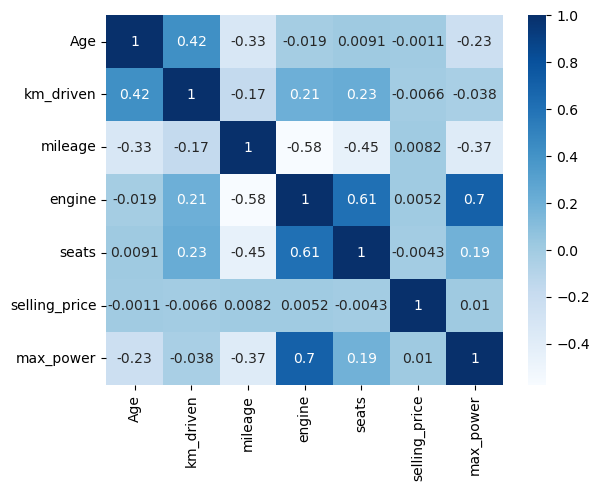

In [18]:
# Selecting the columns
correlation_var = data[["Age","km_driven","mileage","engine","seats","selling_price","max_power"]]
# Plotting the correlation matrix
sns.heatmap(correlation_var.corr(), cmap='Blues', annot=True)

Since seats has less than 1% of unique value and also the correlation  between seats and selling_price is less, we can drop the column. Dropping the transmission and seller_type column too as it only has two,three variables respectively and it has less than 1% unique values.

In [19]:
# Dropping seats, transmission and seller_type columns
data=data.drop("seats",axis=1)
data=data.drop("transmission",axis=1)
data=data.drop("seller_type",axis=1)

# Deleting duplicates 

Checking for duplicates, there are 1202 dulicate rows.  

In [20]:
dups = data.duplicated()
data[dups]

,name,km_driven,fuel,owner,mileage,engine,max_power,Age,selling_price
291,Hyundai Grand i10 Sportz,35000,Petrol,First Owner,18.90,1197.0,82.00,7,450000
296,Maruti Swift VXI,50000,Petrol,Second Owner,18.60,1197.0,85.80,12,330000
370,Jaguar XE 2016-2019 2.0L Diesel Prestige,9000,Diesel,First Owner,13.60,1999.0,177.00,7,2625000
371,Lexus ES 300h,20000,Petrol,First Owner,22.37,2487.0,214.56,5,5150000
372,Jaguar XF 2.0 Diesel Portfolio,45000,Diesel,First Owner,19.33,1999.0,177.00,7,3200000
...,...,...,...,...,...,...,...,...,...
7987,Renault Captur 1.5 Diesel RXT,12000,Diesel,First Owner,20.37,1461.0,108.45,6,1265000
7988,Maruti Ciaz Alpha Diesel,32000,Diesel,First Owner,28.09,1248.0,88.50,5,1025000
8117,Maruti Swift Dzire VDI,50000,Diesel,First Owner,26.59,1248.0,74.00,9,625000
8126,Tata Indigo CR4,25000,Diesel,First Owner,23.57,1396.0,70.00,11,290000


Now we will be  deleting them from the dataset so that we dont have inflated performance analysis

In [21]:
data.drop_duplicates(inplace=True)

In [22]:
data.duplicated().sum()

0

# Finding and removing outliers 

In [23]:
data.describe()

,km_driven,mileage,engine,max_power,Age,selling_price
count,6.926000e+03,6718.00000,6718.000000,6720.000000,6926.000000,6.926000e+03
mean,7.399568e+04,19.46531,1430.891337,87.726919,10.579700,1.239008e+06
std,5.835810e+04,4.04915,493.493277,31.771619,4.078286,6.007587e+07
min,1.000000e+00,0.00000,624.000000,0.000000,4.000000,0.000000e+00
25%,4.000000e+04,16.80000,1197.000000,67.100000,7.000000,2.500000e+05
50%,7.000000e+04,19.44000,1248.000000,81.830000,10.000000,4.000000e+05
75%,1.000000e+05,22.50000,1498.000000,100.000000,13.000000,6.335000e+05
max,2.360457e+06,42.00000,3604.000000,400.000000,41.000000,5.000000e+09


From the above data:
we can see that selling price min price is 0 and max is 5000000000. These seems like an error values. 
The min value of km driven is 1 and the max value seems to be 2360457 while the mean is only 73995.68. The min value of mileage is 0. These needs to be inspected. 


In [24]:
# Plotting a boxplot graph for km_driven values
#fig = plt.figure(figsize=(8,6))
#sns.boxplot(data.km_driven)
#plt.show()

In [25]:
# Inspecting km_driven column with greater than value of 500000
data[data.km_driven> 500000]

,name,km_driven,fuel,owner,mileage,engine,max_power,Age,selling_price
1810,Mahindra XUV500 W6 2WD,1500000,Diesel,First Owner,15.1,2179.0,140.00,12,500000
3486,Hyundai i20 Asta 1.2,2360457,Petrol,Second Owner,18.6,1197.0,81.83,17,550000
3508,Maruti Wagon R LXI Minor,577414,Petrol,Second Owner,18.9,1061.0,67.00,14,194000


In [26]:
# Dropping the km_driven value which is greater than 500000
data = data[data.km_driven< 500000]

In [27]:
# Inspecting km_driven column with less than value of 100
data[data.km_driven<100]

,name,km_driven,fuel,owner,mileage,engine,max_power,Age,selling_price
7913,Maruti Eeco 5 STR With AC Plus HTR CNG,1,CNG,Fourth & Above Owner,15.1,1196.0,73.0,13,209000


In [28]:
# Dropping columns less than 100 km driven
data = data[data.km_driven>100]

In [29]:
# Plotting a boxplot graph for selling_price column
#fig = plt.figure(figsize=(8,6))
#sns.boxplot(data.selling_price)
#plt.show()

In [30]:
# Inspecting selling price column with greater than price 10000000
data[data.selling_price>= 10000000]

,name,km_driven,fuel,owner,mileage,engine,max_power,Age,selling_price
17,Hyundai i20 1.4 CRDi Asta,53000,Diesel,Second Owner,23.0,1396.0,90.0,12,5000000000
170,Volvo XC90 T8 Excellence BSIV,30000,Petrol,First Owner,42.0,1969.0,400.0,7,10000000


In [31]:
# Dropping the row with greater than price 10000000
data = data[data.selling_price<10000000]

In [32]:
# Plotting the graph again for selling_price
#fig = plt.figure(figsize=(8,6))
#sns.boxplot(data.selling_price)
#plt.show()

In [33]:
# Inspecting selling price column with less than price 10 based on the data given in data.describe
data[data.selling_price<10]

,name,km_driven,fuel,owner,mileage,engine,max_power,Age,selling_price
8109,Ford Freestyle Titanium Plus Diesel BSIV,24000,Diesel,First Owner,24.4,1498.0,98.63,6,0


In [34]:
# Dropping the row with greater than price 10000000
data = data[data.selling_price>0]

In [35]:
# Plotting a boxplot graph for the age
#fig = plt.figure(figsize=(8,6))
#sns.boxplot(data.Age)
#plt.show() 

In [36]:
# Inspecting car data with age more than 30
data[data.Age>30]

,name,km_driven,fuel,owner,mileage,engine,max_power,Age,selling_price
316,Mahindra Willys CJ 3B 4X4,10000,Diesel,Third Owner,NaN,NaN,NaN,41,300000
5322,Maruti Omni LPG STD BSIV,120000,LPG,Second Owner,NaN,NaN,NaN,33,55000


In [37]:
# Dropping the cars with age more than 30
data = data[data.Age<30]

In [38]:
# Plotting the boxplot graph for engine cc
#fig = plt.figure(figsize=(8,6))
#sns.boxplot(data.engine)
#plt.show()

No values were dropped as the values belong in general engine cc range

In [39]:
# Plotting the boxplot graph for mileage
#fig = plt.figure(figsize=(8,6))
#sns.boxplot(data.mileage)
#plt.show()

In [40]:
# Inspecting cars with mileage less than 1 
data[data.mileage<=1]

,name,km_driven,fuel,owner,mileage,engine,max_power,Age,selling_price
644,Tata Indica Vista Aura Safire Anniversary Edition,28900,Petrol,Second Owner,0.0,1172.0,65.00,15,135000
785,Hyundai Santro Xing GL,90000,Petrol,Second Owner,0.0,1086.0,62.00,15,120000
1649,Hyundai Santro Xing GL,128000,Petrol,First Owner,0.0,1086.0,62.00,16,105000
1676,Mercedes-Benz M-Class ML 350 4Matic,110000,Diesel,Third Owner,0.0,2987.0,165.00,13,1700000
2137,Land Rover Freelander 2 TD4 HSE,64788,Diesel,First Owner,0.0,2179.0,115.00,11,1650000
2366,Hyundai Santro Xing (Non-AC),80000,Petrol,Second Owner,0.0,1086.0,62.10,14,110000
2725,Hyundai Santro Xing (Non-AC),15000,Petrol,First Owner,0.0,1086.0,62.10,11,184000
5276,Hyundai Santro Xing GL,40000,Petrol,First Owner,0.0,1086.0,62.00,16,175000
5843,Volkswagen Polo GT TSI BSIV,28080,Petrol,First Owner,0.0,1197.0,103.25,10,574000
5846,Volkswagen Polo GT TSI BSIV,28100,Petrol,First Owner,0.0,1197.0,103.25,10,575000


In [41]:
# Dropping rows with mileage equal to zero
data = data[data.mileage!=0]

In [42]:
# Plotting the boxplot graph for max_power
#fig = plt.figure(figsize=(8,6))
#sns.boxplot(data.max_power)
#plt.show()

Checking for max power values less than 1

In [43]:
data[data.max_power<1]

,name,km_driven,fuel,owner,mileage,engine,max_power,Age,selling_price
575,Maruti Alto K10 LXI,97500,Petrol,First Owner,NaN,NaN,0.0,13,204999
1442,Maruti Swift Dzire VDI Optional,41232,Diesel,First Owner,NaN,NaN,0.0,7,589000
2549,Tata Indica Vista Quadrajet LS,70000,Diesel,First Owner,NaN,NaN,0.0,12,240000


Deleting values less than 1

In [44]:
data = data[data.max_power!=0]

Since LocaloutlierFactor does not work with missing/Nan values, we will be applying it after the missing values are handled

# Handling Missing values 

Finding missing values in each column, we can see that the missing values are in mileage,engine and max_power columns


In [45]:
data.isnull().sum()

name               0
km_driven          0
fuel               0
owner              0
mileage          202
engine           202
max_power        203
Age                0
selling_price      0
dtype: int64

Replacing missing values as NAN. We see that the three columns with missing values are mileage,engine and max_power. A mean imputer is used as the number o

In [46]:
data.replace("",np.nan)


,name,km_driven,fuel,owner,mileage,engine,max_power,Age,selling_price
0,Maruti Swift Dzire VDI,145500,Diesel,First Owner,23.40,1248.0,74.00,10,450000
1,Skoda Rapid 1.5 TDI Ambition,120000,Diesel,Second Owner,21.14,1498.0,103.52,10,370000
2,Honda City 2017-2020 EXi,140000,Petrol,Third Owner,17.70,1497.0,78.00,18,158000
3,Hyundai i20 Sportz Diesel,127000,Diesel,First Owner,23.00,1396.0,90.00,14,225000
4,Maruti Swift VXI BSIII,120000,Petrol,First Owner,16.10,1298.0,88.20,17,130000
...,...,...,...,...,...,...,...,...,...
8121,Maruti Wagon R VXI BS IV with ABS,50000,Petrol,Second Owner,18.90,998.0,67.10,11,260000
8122,Hyundai i20 Magna 1.4 CRDi,80000,Diesel,Second Owner,22.54,1396.0,88.73,10,475000
8123,Hyundai i20 Magna,110000,Petrol,First Owner,18.50,1197.0,82.85,11,320000
8124,Hyundai Verna CRDi SX,119000,Diesel,Fourth & Above Owner,16.80,1493.0,110.00,17,135000


Imputing missing values using mean as there are no large outliers

In [47]:
# Defining imputer 
imputer = SimpleImputer(strategy="mean")
# Grouping the columns with missing data 
col = data[["mileage","engine","max_power"]]
# Fitting the imputer onto the columns
imputer.fit(col)
# Transforming the columns with missing data 
imputed_data=imputer.transform(col)
# Converts to DataFrame for better display
data.loc[:,["mileage","engine","max_power"]] = imputed_data

Checking of there is any null value

In [48]:
data.isnull().sum()

name             0
km_driven        0
fuel             0
owner            0
mileage          0
engine           0
max_power        0
Age              0
selling_price    0
dtype: int64

Resetting the index so as to ensure there is no issue while merging datasets in future

In [49]:
data = data.reset_index(drop= True)

# LocalOutlierFactor

checking the number of outliers with LocalOutlierFactor after imputing missing values as it does not work with missing/Nan Values. 

In [50]:
from sklearn.neighbors import LocalOutlierFactor

df = data[["km_driven",
           "mileage",
           "engine",
           "max_power",
           "Age",
           "selling_price"]]
lof = LocalOutlierFactor()
yhat = lof.fit_predict(df)
mask = yhat != -1 
data = data[mask]
#data[mask].count()

In [51]:
data.isnull().sum()

name             0
km_driven        0
fuel             0
owner            0
mileage          0
engine           0
max_power        0
Age              0
selling_price    0
dtype: int64

The local outliers are dropped

In [52]:
data = data.reset_index(drop= True)

# Normalisation

Checking to see the mmin and max of the columns and if it varies across the dataset 

In [53]:
data.describe()

,km_driven,mileage,engine,max_power,Age,selling_price
count,6735.000000,6735.000000,6735.000000,6735.000000,6735.000000,6.735000e+03
mean,71677.165256,19.548549,1423.564886,87.526175,10.538976,5.132781e+05
std,44053.959164,3.858822,479.043159,30.786427,4.036651,4.968776e+05
min,1000.000000,9.000000,624.000000,32.800000,4.000000,2.999900e+04
25%,39000.000000,17.000000,1197.000000,68.000000,7.000000,2.500000e+05
50%,69123.000000,19.508377,1248.000000,81.860000,10.000000,4.099990e+05
75%,100000.000000,22.320000,1498.000000,98.960000,13.000000,6.300000e+05
max,330000.000000,33.440000,3498.000000,282.000000,29.000000,7.200000e+06


array([[<Axes: title={'center': 'km_driven'}>,
        <Axes: title={'center': 'mileage'}>],
       [<Axes: title={'center': 'engine'}>,
        <Axes: title={'center': 'max_power'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'selling_price'}>]], dtype=object)

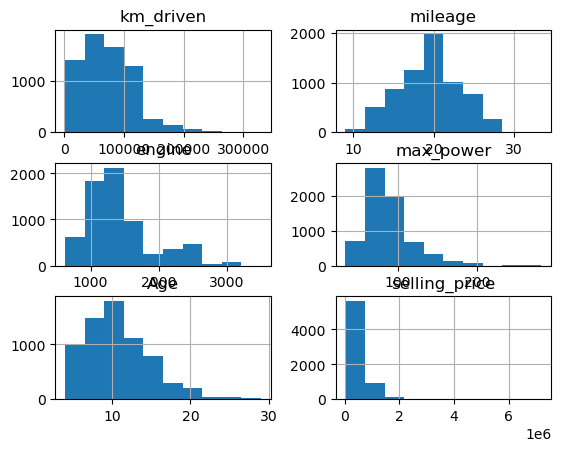

In [54]:
data.hist()

In [55]:
data

,name,km_driven,fuel,owner,mileage,engine,max_power,Age,selling_price
0,Maruti Swift Dzire VDI,145500,Diesel,First Owner,23.40,1248.0,74.00,10,450000
1,Skoda Rapid 1.5 TDI Ambition,120000,Diesel,Second Owner,21.14,1498.0,103.52,10,370000
2,Honda City 2017-2020 EXi,140000,Petrol,Third Owner,17.70,1497.0,78.00,18,158000
3,Hyundai i20 Sportz Diesel,127000,Diesel,First Owner,23.00,1396.0,90.00,14,225000
4,Maruti Swift VXI BSIII,120000,Petrol,First Owner,16.10,1298.0,88.20,17,130000
...,...,...,...,...,...,...,...,...,...
6730,Maruti Wagon R VXI BS IV with ABS,50000,Petrol,Second Owner,18.90,998.0,67.10,11,260000
6731,Hyundai i20 Magna 1.4 CRDi,80000,Diesel,Second Owner,22.54,1396.0,88.73,10,475000
6732,Hyundai i20 Magna,110000,Petrol,First Owner,18.50,1197.0,82.85,11,320000
6733,Hyundai Verna CRDi SX,119000,Diesel,Fourth & Above Owner,16.80,1493.0,110.00,17,135000


 We are not standardising the datset because we only have one column which is showing gaussian distribution in this dataset. Since the min and max value range varies across the dataset, normalisation will be used

In [56]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
# Only using the numerical columns and excluding the label column
scale = data.values[:,[1,4,5,6,7]]
# Applying the MinMaxScaler 
#trans = MinMaxScaler()

#scaled = trans.fit_transform(scale)
trans1 = StandardScaler()
scale1 = trans1.fit_transform(scale)
# Converting array to dataframe
scaled = pd.DataFrame(scale1)

In [57]:
scaled.rename(columns={0: "km_driven",
                       1:"mileage",
                       2:"engine",
                       3:"max_power",
                       4:"Age",}, inplace=True)

Adding the standardised values back into the data

In [58]:
data[["km_driven","mileage","engine","max_power","Age"]]= scaled[["km_driven","mileage","engine","max_power","Age"]]

Checking the dataset after normalisation

In [59]:
data.describe()

,km_driven,mileage,engine,max_power,Age,selling_price
count,6.735000e+03,6.735000e+03,6.735000e+03,6.735000e+03,6.735000e+03,6.735000e+03
mean,9.917003e-17,2.299901e-16,1.756576e-16,4.114501e-17,1.688001e-16,5.132781e+05
std,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,1.000074e+00,4.968776e+05
min,-1.604451e+00,-2.733822e+00,-1.669211e+00,-1.777739e+00,-1.620021e+00,2.999900e+04
25%,-7.418083e-01,-6.604964e-01,-4.729881e-01,-6.342933e-01,-8.767758e-01,2.500000e+05
50%,-5.798241e-02,-1.041120e-02,-3.665180e-01,-1.840615e-01,-1.335304e-01,4.099990e+05
75%,6.429601e-01,7.182649e-01,1.553944e-01,3.714193e-01,6.097151e-01,6.300000e+05
max,5.864218e+00,3.600187e+00,4.330694e+00,6.317338e+00,4.573691e+00,7.200000e+06


# Encoding  categorical labels 

Since the dimensionality of categorical column name is huge, we are label encoding it. Since the owner column has an ordinal relationship, we will be using ordinal encoding for this column. Fuel column will be encoded using one hot encoding to avoid an ordinal relationship

Using one hot encoder on colums fuel,seller_type and transmission

In [60]:
from sklearn.preprocessing import OneHotEncoder

# Selcting the specific columns for one hot encoding
ohe_data = data[["fuel"]]
columns = ["fuel"]
# Initialising the encoder and fitting it on the columns
encoder = OneHotEncoder(sparse_output=False)
result = encoder.fit_transform(ohe_data.values.astype(str))
# Feature columns 
ohe_columns = encoder.get_feature_names_out()
# Converting the array to a dataframe
ohe_df = pd.DataFrame(result, columns = ohe_columns)

Replacing the one hot encoded columns in the main dataset

In [61]:
# Dropping the pre-existing columns 
data=data.drop(["fuel"],axis=1)
# Adding the one hot encoded columns
data= pd.concat([ohe_df,data],axis=1)

Using label encoder on name column as it has huge dimensionality

In [62]:
from sklearn.preprocessing import LabelEncoder

# Initialising the label encoder 
le = LabelEncoder()
# Transforming data
data['name'] = le.fit_transform(data['name']) 

Using ordinal encoder on owner column

In [63]:
from sklearn.preprocessing import OrdinalEncoder


# Selecting the column and mapping order
oe = data[["owner"]]
# Fitting onto the column
encoder = OrdinalEncoder(categories=[["First Owner",
                                      "Second Owner",
                                      "Third Owner",
                                      "Fourth & Above Owner",
                                      "Test Drive Car"]])
result = encoder.fit_transform(oe)
oe_df = pd.DataFrame(result)

Adding the encoded column back to the dataset 

In [64]:
data[["owner"]] = oe_df

In [65]:
#data = data.drop("name",axis=1)

# Splitting data 

The data is split into training set, test set and validation set. The validation set will be used to evaluate the model before and after the hypertuning. The test set will be used to check the model performance on new set of data based on hyper parameter tuning. 

In [66]:
from sklearn.model_selection import train_test_split
np.random.seed(1)
# Setting the target variable as y and input variable as X 
X = data.drop("selling_price",axis=1)
y = data["selling_price"]

# Splitting the data into 80% training data and 20% test data
X_train_full, X_test, y_train_full, y_test = train_test_split(X,y, test_size=0.2, random_state=3)

# Splitting training data into 20% validation data and 80% training data
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.25, random_state=3)

Checking the size of test, training and validation set



In [67]:
print("length of dataset:",len(X))
print("length of training set:",len(X_train))
print("length of validation set:",len(X_val))
print("length of test set:",len(X_test))

length of dataset: 6735
length of training set: 4041
length of validation set: 1347
length of test set: 1347


# Linear Regression

# Linear regression model training (Validation set)

The linear regression model is one of the simple regression models. It assumes that there is a linear relationship between the target and the one or more variable. We have checked the Mean Absolute error, Mean squared error and r2 of the linear model. We see that the model has not performed great on this model. 

In [68]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import learning_curve


#fitting and training the training set
lr = LinearRegression()
lr.fit(X_train, y_train)

# Making predictions on validation set of dataset
y_pred_lr = lr.predict(X_val)

                   
# Finding the Mean absolute error, Mean squared error and the r2 value of the validation set 
MAE_lr = mean_absolute_error(y_val,y_pred_lr)
MSE_lr = mean_squared_error(y_val,y_pred_lr)
r2_lr  = r2_score(y_val,y_pred_lr)

print("Mean Absolute Error validation set:",MAE_lr)
print("Mean Squared Error validation set:",MSE_lr)
print("R2 score in validation set:",r2_lr)

Mean Absolute Error validation set: 172213.86784983936
Mean Squared Error validation set: 90757171546.19806
R2 score in validation set: 0.5873553255790736


Plotting a learning curve, we can see that the variance was high in the beginning with high r2 score for train data but the validation set had lesser r2 score. The model was unable to capture the underlying pattern of data. It shows high bias. 

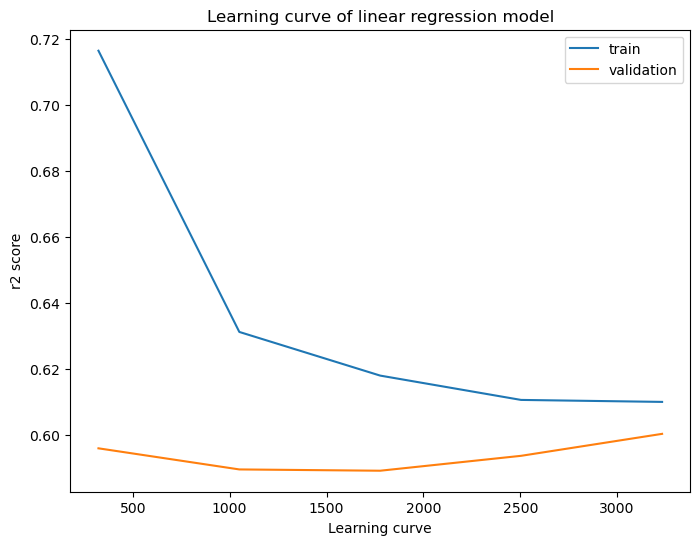

In [69]:
# Calculating the learning curve
train_sizes, train_scores, test_scores = learning_curve(
                                         lr,
                                         X_train,y_train,
                                         cv=5,
                                         scoring="r2",
                                         train_sizes=np.linspace(0.1,1.0,5))

# Calculating the mean and std deviation of test and train scores
train_mean_lr = train_scores.mean(axis=1)
test_mean_lr = test_scores.mean(axis=1)


# Plotting the learning curve for train and validation data
plt.subplots(figsize=(8,6))
plt.plot(train_sizes, train_mean_lr,label="train")
plt.plot(train_sizes, test_mean_lr, label ="validation")

plt.title("Learning curve of linear regression model")
plt.ylabel("r2 score")
plt.xlabel("Learning curve")
plt.legend(loc="best")
plt.show()

Finding all the parameters and default value in linear regression.

In [70]:
lr.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

# Hyper parameter tuning : GridSearchCV for Linear regression (Validation set)

GridSearch CV is used to optimise the model based on the hyperparameters. Since linear regression does not have a lot of parameters to tune, the change is very slight. The best estimator is found out and train data is trained on this model. The paramater used here is "fit intercept" and n_jobs. The MAE,MSE and r2 score is calculated on the validation set so that there is no data leak during the optimisation process. 

In [71]:
from sklearn.model_selection import GridSearchCV

# Adding the different parameters and values that needs to be checked
param_grid = {"fit_intercept" : [True, False],
             "n_jobs":[1,None]}
# Creating a grid_search object with 5 fold cross validation
grid_search = GridSearchCV(lr, param_grid, cv=5, scoring="r2")
# Fitting the grid_search object onto the training data
grid_search.fit(X_train,y_train)

best_mod = grid_search.best_estimator_
best_params = grid_search.best_params_

# Making predictions on validation set of dataset
y_pred_hp_lr = best_mod.predict(X_val)

# Finding the MAE, MSE and r2 on validation set based on best parameters

MAE_hp_lr = mean_absolute_error(y_val,y_pred_hp_lr)
MSE_hp_lr = mean_squared_error(y_val,y_pred_hp_lr)
r2_hp_lr = r2_score(y_val,y_pred_hp_lr)


print("Best parameters",best_params)
print("Mean absolute error on validation set", MAE_hp_lr)
print("Mean square error on validation set", MSE_hp_lr)
print("r2 score on validation set", r2_hp_lr)

Best parameters {'fit_intercept': True, 'n_jobs': 1}
Mean absolute error on validation set 172213.86784983936
Mean square error on validation set 90757171546.19806
r2 score on validation set 0.5873553255790736


# Best parameter model for linear regression (Test set)

Now so as to try on a unseen data and generalise the model, we will be testing on test set. We will be using the using the best parameters we got in the grid search we will be building another model. We are also doing cross validation to check how the model performs with different 5 folds of data so as to compare different models. 

We can see that model is performing better on training data than test data but the difference is not huge so there is no overfitting. 

In [72]:
from sklearn.model_selection import cross_val_score

#fitting and training the training set
lr_test = LinearRegression(fit_intercept= False, n_jobs= 1)
lr_test.fit(X_train, y_train)

# Making predictions on test set of dataset
y_pred_test_lr = lr.predict(X_test)
# Making predictions on train data to see if the model is overfitting 
y_pred_train_lr = lr.predict(X_train)

# Finding the Mean absolute error, Mean squared error and the r2 value of the test set 
MAE_test_lr = mean_absolute_error(y_test, y_pred_test_lr)
MSE_test_lr = mean_squared_error(y_test, y_pred_test_lr)
r2_test_lr  = r2_score(y_test, y_pred_test_lr)
r2_train_lr = r2_score(y_train, y_pred_train_lr)
# Finding cross validation r2 score of train data in 5 folds
cv_r2_lr = cross_val_score(lr_test, X_train, y_train, cv=5, scoring="r2")
# Finding mean of all r2 scores in all 5 folds
cv_mean_lr = cv_r2_lr.mean()

print("Mean Absolute Error on test set:",MAE_test_lr)
print("Mean Squared Error on test set:",MSE_test_lr)
print("R2 score on test data:",r2_test_lr)
print("R2 value on train data:",r2_train_lr)
print("cross validation r2 :",cv_mean_lr)

Mean Absolute Error on test set: 170034.6955827663
Mean Squared Error on test set: 96580122682.14444
R2 score on test data: 0.5723375833115166
R2 value on train data: 0.6088917147380554
cross validation r2 : 0.600466056649576


The Actual vs predicted value graph is ploted with actual values of test set on the y axis and predicted values of test set on x axis. The red line in the graph represents when the actual value is equal to the predicted value. We can see that the predicted values are near to the line when are small values but as the values increase they start to deviate away from the actual values. This would explain the higher MSE score which is sensitive to large errors.

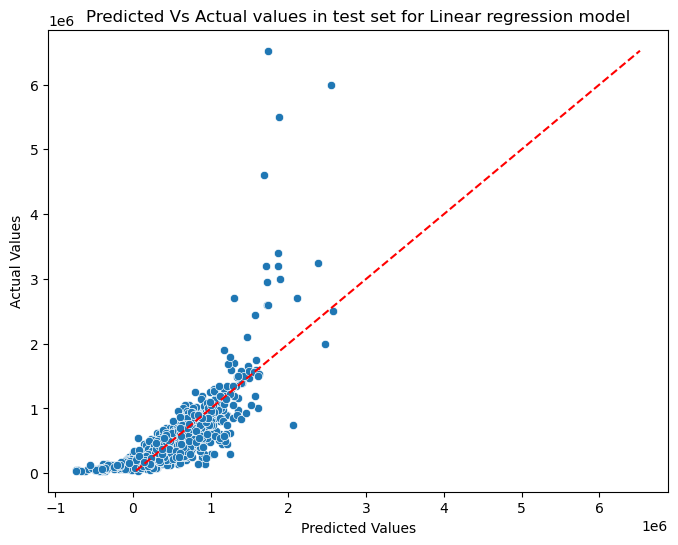

In [73]:
# Plotting the scatter plot with Predicted Vs Actual Values 
plt.figure(figsize=(8,6))
sns.scatterplot(y=y_test, x=y_pred_test_lr)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color="red",linestyle="--")

# Adding labels and title to the graph 
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted Vs Actual values in test set for Linear regression model")
plt.show()

In the residual vs fitted plot the residual is plotted on the y label and fitted values of test set are plotted on the x axis. The residual is the difference between the predicted value and actual value. The points are not scattered around the y=0 dotted line, the points show a u curve pattern where the larger values deviate further from the line, this shows that the linear model was unable to learn the non linear relationship in the data

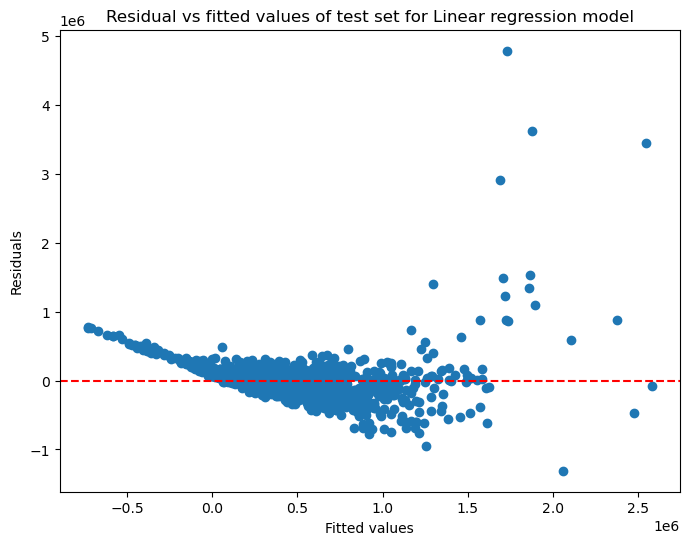

In [74]:
# Finding the residual values of test set
residuals_lr = y_test-y_pred_test_lr
# Plotting the scatter plot
plt.figure(figsize=(8,6))
plt.scatter(y_pred_test_lr, residuals_lr)
# plotting the y = 0 line
plt.axhline(y=0,color="red",linestyle="--")

plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residual vs fitted values of test set for Linear regression model")
plt.show()

# KNeighbour Regression

# KNeighbour Regressor model training(Validation set)

Since the previous model did not perform well with this dataset, we will be examining a KNN regressor model which is also a basic model but it works well with data with non linear relationship unlike the linear regression model as it does not make any assumptions about the underlying data distribution. The r2 value has significantly improved from the linear regression model. The MAE and MSE has also reduced compared to the linear regression model.

In [75]:
from sklearn.neighbors import KNeighborsRegressor

#fitting and training the training set
knn = KNeighborsRegressor(n_neighbors = 5)
knn.fit(X_train, y_train)

# Making predictions on validation set of dataset
y_pred_knn = knn.predict(X_val)

# Finding the Mean absolute error, Mean squared error and the r2 value of the validation set 
MAE_knn = mean_absolute_error(y_val,y_pred_knn)
MSE_knn = mean_squared_error(y_val,y_pred_knn)
r2_knn  = r2_score(y_val,y_pred_knn)

print("Mean Absolute Error on validation set:",MAE_knn)
print("Mean Squared Error on validation set:",MSE_knn)
print("R2 score:",r2_knn)

Mean Absolute Error on validation set: 105400.32279138826
Mean Squared Error on validation set: 54977104381.642525
R2 score: 0.7500361794922142


Plotting the learning curve for the training and validation set, we see that both the train and validation set r2 scores increased over the time.  The variance between test and validation test r2 scores also seems to have remained through out the entire data samples

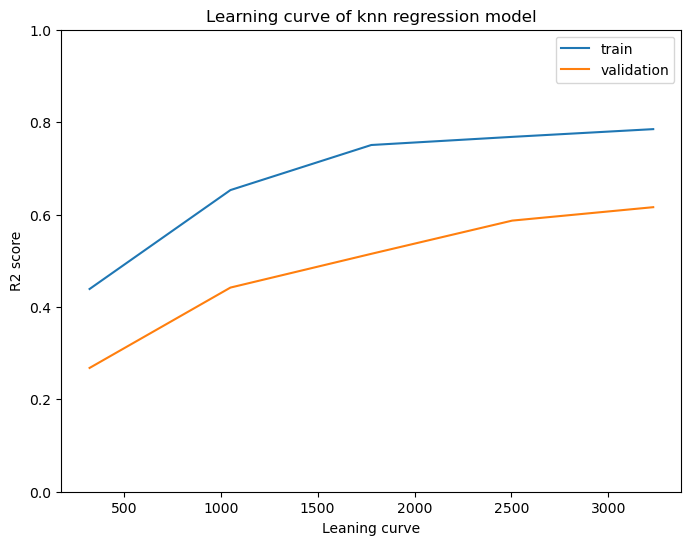

In [76]:
# Calculation the learbing curve for knn regressor model
train_sizes, train_scores, test_scores = learning_curve(
                                          knn, 
                                          X_train,y_train,
                                          cv=5,
                                          scoring="r2",
                                          train_sizes=np.linspace(0.1,1,5))

# Calculating the mean and std deviation of test and train 
train_mean_knn = train_scores.mean(axis=1)
train_std_knn = train_scores.std(axis=1)
test_mean_knn = test_scores.mean(axis=1)
test_std_knn = test_scores.std(axis=1)


# Plotting the learning curve for train and validation data
plt.subplots(figsize=(8,6))
plt.plot(train_sizes, train_mean_knn, label="train")
plt.plot(train_sizes, test_mean_knn, label="validation")


plt.title("Learning curve of knn regression model")
plt.xlabel("Leaning curve")
plt.ylabel("R2 score")
plt.ylim(0,1)
plt.legend(loc="best")
plt.show()

Getting all the parameters and default values

In [77]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

# Hyperparameter tuning: GridSearchCV for KNN regressor (Validation set)

We will be using k from values 1 to 100 to search which one gives us the best values. The best estimator model is fitted onto the training data and the r2 score has imprived to 0.76. The MSE value has overall reduced but is still quite high which indicates there are some large values which are significantly off.

In [78]:
from sklearn.model_selection import GridSearchCV

# Adding the different parameters that needs to be checked
param_grid = {"n_neighbors" : np.arange(1, 100)}

# Creating a grid_search object with knn model and 5 fold cross validation and scoring as r2
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring="r2")
# Fitting the grid_search object onto the training data
grid_search.fit(X_train,y_train)

# Finding the best estimator model
best_mod_knn = grid_search.best_estimator_

# Finding the best params 
best_params_knn = grid_search.best_params_

# Making predictions on validation set of dataset
y_pred_hp_knn = best_mod_knn.predict(X_val)

# Finding the MAE, MSE and r2 on validation set based on best parameters
MAE_hp_knn = mean_absolute_error(y_val,y_pred_hp_knn)
MSE_hp_knn = mean_squared_error(y_val,y_pred_hp_knn)
r2_hp_knn = r2_score(y_val,y_pred_hp_knn)


print("Best parameters",best_params_knn)
print("Mean absolute error of val set", MAE_hp_knn)
print("Mean square error of val set", MSE_hp_knn)
print("r2 score of val set", r2_hp_knn)

Best parameters {'n_neighbors': 3}
Mean absolute error of val set 104038.96956198961
Mean square error of val set 51426471487.37475
r2 score of val set 0.7661798046149689


# Best parameter model for KNN regressor (Test set)

The grid search shows the best value of k is 3. Hence a model with k = 4 is build with knn regressor. R2 score on the unseen test data with best parameters is better than the linear regression model but it does not perform very well with the cross validation train data  

In [79]:
#fitting and training the training set
knn_test = KNeighborsRegressor(n_neighbors = 3)
knn_test.fit(X_train, y_train)

# Making predictions on test set of dataset
y_pred_test_knn = knn_test.predict(X_test)
# Making predictions on train data to see if the model is overfitting 
y_pred_train_knn = knn_test.predict(X_train)

# Finding the Mean absolute error, Mean squared error and the r2 value of the test set 
MAE_test_knn = mean_absolute_error(y_test, y_pred_test_knn)
MSE_test_knn = mean_squared_error(y_test, y_pred_test_knn)
r2_test_knn  = r2_score(y_test, y_pred_test_knn)
r2_train_knn = r2_score(y_train, y_pred_train_knn)

# Finding cross validation r2 score of train data in 5 folds
cv_r2_knn = cross_val_score(knn_test, X_train, y_train, cv=5, scoring="r2")
# Finding mean of all r2 scores in all 5 folds
cv_mean_knn = cv_r2_knn.mean()

print("Mean Absolute Error on test set:",MAE_test_knn)
print("Mean Squared Error on test set:",MSE_test_knn)
print("R2 score on test data on test set:",r2_test_knn)
print("R2 value on train data:",r2_train_knn)
print("cross validation r2:",cv_mean_knn)

Mean Absolute Error on test set: 98973.60702796339
Mean Squared Error on test set: 46476467204.36014
R2 score on test data on test set: 0.7941994922788146
R2 value on train data: 0.8846995737168
cross validation r2: 0.6524081173149903


The actual Vs predicted values are plotted against each other for the KNN regressor model. There are deviations but the data seems to fit this model better than the linear regression model.

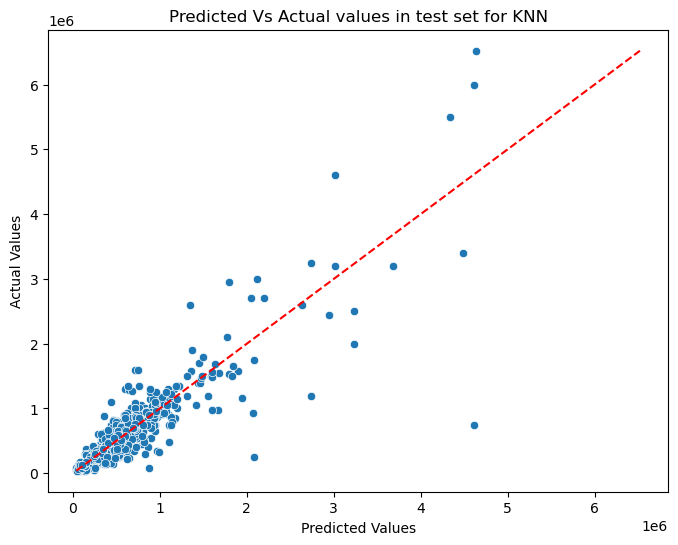

In [80]:
# Plotting the scatter plot with Predicted Vs Actual Values 
plt.figure(figsize=(8,6))
sns.scatterplot(y=y_test, x=y_pred_test_knn)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color="red",linestyle="--")

# Adding labels and title to the graph 
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted Vs Actual values in test set for KNN")
plt.show()

Compared to the linear model residual vs fitted plot, majority of the points seem to be scattered around the y=0 dotted line. It does not seem to form a pattern unlike the linear regression plot. 

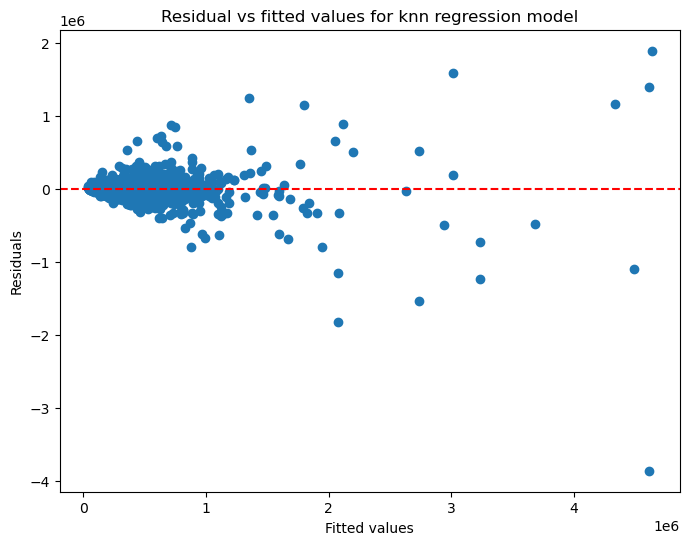

In [81]:
# Finding the residual values of validation set
residuals_knn = y_test-y_pred_test_knn
# Plotting the scatter plot
plt.figure(figsize=(8,6))
plt.scatter(y_pred_test_knn,residuals_knn)
# plotting the y = 0 line
plt.axhline(y=0,color="red",linestyle="--")

# Label and title of the graph
plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residual vs fitted values for knn regression model")
plt.show()

# Random Forest Regression

# Random Forest Regression model training (Validation set)

Even though KNN regressor model was performing better than linear regression model, the model does not perform very well with unseen data. From the Residual vs fitted graph of knn regressor, we can see there seems to be some outliers. Random forest regressors are not very sensitive to outliers hence we will using Random forest algorithm to predict the selling price. The model performs better than KNN regressor. The r2 value has increased and MSE and MAE score has decreased.

In [82]:
from sklearn.ensemble import RandomForestRegressor

# Fitting and training the validation set
rf = RandomForestRegressor(n_estimators=10,random_state=3) 
rf.fit(X_train, y_train)

# Making predictions on validation set of dataset
y_pred_rf = rf.predict(X_val)

# Finding the Mean absolute error, Mean squared error and the r2 value of the validation set 
MAE_rf = mean_absolute_error(y_val,y_pred_rf)
MSE_rf = mean_squared_error(y_val,y_pred_rf)
r2_rf  = r2_score(y_val,y_pred_rf)

print("Mean Absolute Error on validation set:",MAE_rf)
print("Mean Squared Error on validation set:",MSE_rf)
print("R2 score:",r2_rf)

Mean Absolute Error on validation set: 80680.89079406323
Mean Squared Error on validation set: 29628936848.547787
R2 score: 0.8652864254029371


The model had more variance in the beginning but the r2 score of validation set started having a better r2 score as more data was given. The variance also reduced. Both the training and validation set performed well. 

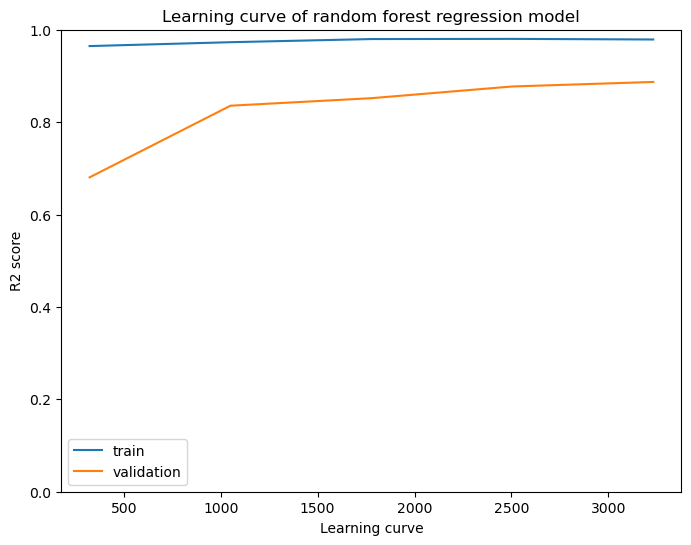

In [83]:
# Calculating the learning curve for the random forest regresssor model
train_size, train_scores, test_scores = learning_curve(
                                        rf,
                                        X_train, y_train,
                                        cv=5,
                                        scoring="r2",
                                        train_sizes=np.linspace(0.1,1,5))

# Calculating the mean of test and train 
train_mean_rf = train_scores.mean(axis=1)
test_mean_rf = test_scores.mean(axis=1)

# Plotting the learning curve for train and validation data
plt.subplots(figsize=(8,6))
plt.plot(train_sizes, train_mean_rf, label="train")
plt.plot(train_sizes, test_mean_rf, label="validation")

plt.title("Learning curve of random forest regression model")
plt.xlabel("Learning curve")
plt.ylabel("R2 score")
plt.ylim(0,1)
plt.legend(loc="best")

Checking all the default parameters of Random forest regressor

In [84]:
rf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 3,
 'verbose': 0,
 'warm_start': False}

# Hyperparameter tuning : GridSearchCV for Random forest regression (Validation set)

Gridsearchcv is used to tune n_estimators, max_depth, min_samples_split, min_samples_leaf and bootstrap. Then the best estimator is used to predict the selling price in validation dataset. The r2 score increased from 0.86 to 0.88

In [85]:
# Adding the different parameters that needs to be checked
param_grid = {"n_estimators": [50,100,200,300],
              "max_depth": [None,10,20],
              "min_samples_split": [2,5,10],
              "min_samples_leaf": [1,2,4],
              "bootstrap": [True,False]}

# Creating a grid_search object with random forest regressor model 
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring="r2")
# Fitting the grid_search object onto the training data
grid_search.fit(X_train,y_train)

# Finding the best estimator model
best_mod_rf = grid_search.best_estimator_

# Finding the best params 
best_params_rf = grid_search.best_params_

# Making predictions on validation set of dataset
y_pred_hp_rf = best_mod_rf.predict(X_val)

# Finding the MAE, MSE and r2 on validation set based on best parameters
MAE_hp_rf = mean_absolute_error(y_val,y_pred_hp_rf)
MSE_hp_rf = mean_squared_error(y_val,y_pred_hp_rf)
r2_hp_rf = r2_score(y_val,y_pred_hp_rf)


print("Best parameters",best_params_rf)
print("Mean absolute error of val set", MAE_hp_rf)
print("Mean square error of val set", MSE_hp_rf)
print("r2 score of val set", r2_hp_rf)

Best parameters {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 300}
Mean absolute error of val set 76852.69137377708
Mean square error of val set 25741346321.990936
r2 score of val set 0.8829620922376659


# Best parameter model for Random forest regression (Test set)

Using the best parameters a random forest regressor model is made. The model appears to perform well on the unseen data too. There is a slight drop of r2 score between from the training data to the test data and cross validation data. The drop is not huge so it does not suggest a big overfitting issue. The r2 value has increased from the previous model and MSE and MAE has reduced. 

In [86]:
# Initialising the RandomForestRegressor with best parameters
rf_test = RandomForestRegressor(bootstrap=True,
                                n_estimators=300,
                                max_depth=None,
                                min_samples_leaf=1,
                                min_samples_split=5, 
                                random_state =3)

# Fitting the object onto training data
rf_test.fit(X_train, y_train)

# Making predictions on test set
y_pred_test_rf = rf_test.predict(X_test)

# Making predictions on the train set to see if the model is overfitting 
y_pred_train_rf = rf_test.predict(X_train)

# Finding the Mean absolute error, Mean squared error and r2 value on the test set
MAE_test_rf = mean_absolute_error(y_test, y_pred_test_rf)
MSE_test_rf = mean_squared_error(y_test, y_pred_test_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)
r2_train_rf = r2_score(y_train, y_pred_train_rf)

# Finding cross validation r2 score of train data in 5 folds
cv_r2_rf = cross_val_score(rf_test, X_train, y_train, cv=5, scoring ="r2")
# Finding mean of all r2 scores in all 5 folds
cv_mean_rf = cv_r2_rf.mean()

print("Mean absolute error on test data:", MAE_test_rf)
print("Mean squared error on test data", MSE_test_rf)
print("R2 score on test data on test data", r2_test_rf)
print("R2 value on train data", r2_train_rf)
print("cross validation r2 score on train data", cv_mean_rf)

Mean absolute error on test data: 75760.36565928279
Mean squared error on test data 22666780209.123577
R2 score on test data on test data 0.8996301750963438
R2 value on train data 0.9805192963270543
cross validation r2 score on train data 0.886488546297015


From the below Predicted value vs Actual value graph plotted on the validation set, we can see that the data points have moved closer to the red dotted line, which shows that the predicted values are getting closer to the actual values. There seems to be few outliers. The model performs extremely well in lower pricing but as the pricing increases, the number of values decreases and they tend to move away from the dotted line indicating deviation of prediction from from the  actual value

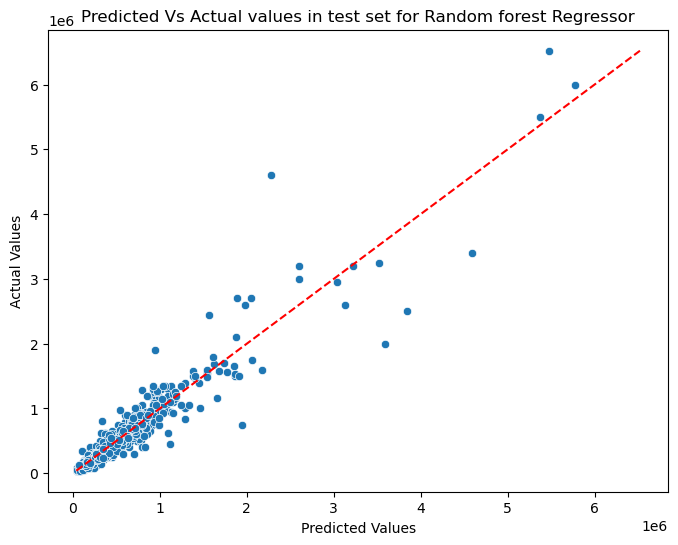

In [87]:
# Plotting the scatter plot with Predicted Vs Actual Values 
plt.figure(figsize=(8,6))
sns.scatterplot(y=y_test, x=y_pred_test_rf)
plt.plot([min(y_test),max(y_test)],[min(y_test),max(y_test)],color="red",linestyle="--")

# Adding labels and title to the graph 
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted Vs Actual values in test set for Random forest Regressor")
plt.show()

The residual vs fitted plot for random forest regressor is quite similar to the residual vs fitted plot of knn regressor. The values do not form any pattern but are scattered around the y=0 line. There are some outliers which are away from y=0 line. 

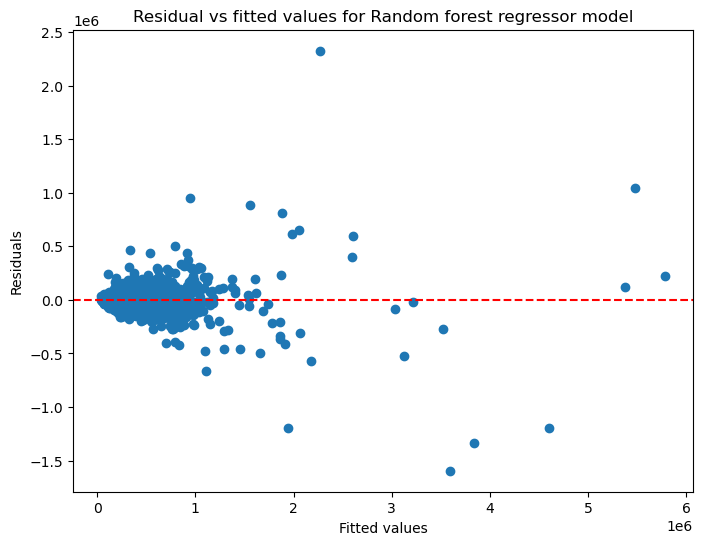

In [88]:
# Finding the residual values of validation set
residuals_rf = y_test-y_pred_test_rf
# Plotting the scatter plot
plt.figure(figsize=(8,6))
plt.scatter(y_pred_test_rf,residuals_rf)
# plotting the y = 0 line
plt.axhline(y=0,color="red",linestyle="--")

plt.xlabel("Fitted values")
plt.ylabel("Residuals")
plt.title("Residual vs fitted values for Random forest regressor model")
plt.show()

# XGBoost Regression

# XGBoost Regressor model training (Validation set)

In the previous random forest regressor model, the r2 value was good but the MSE value was on the higher side. We will be using XGBoost models so that it build trees sequentially and it learn from their error values from last trees. The train data will be wraped with DMatrix for better optimised speed and performance. The r2 score has improved slightly and the MSE values have reduced

In [89]:
import xgboost as xgb

# Wraping data with DMatrix for train data
d_train = xgb.DMatrix(X_train, label=y_train)

# Wraping data with DMatrix for validation data
d_val = xgb.DMatrix(X_val, label=y_val)

xg_params = {"objective":"reg:squarederror",
             "eta": 0.1,
             "max_depth": 10,
             "min_child_weight": 3,
             "learning_rate": 0.1,
             "seed": 1}

# Training the model
xg = xgb.train(xg_params, d_train, num_boost_round=50)

# Making predictions on validation set 
y_pred_xg = xg.predict(d_val)

# Finding MAE, MSE and r2 score of the validation set 
MAE_xgb = mean_absolute_error(y_val, y_pred_xg)
MSE_xgb = mean_squared_error(y_val, y_pred_xg)
r2_xgb = r2_score(y_val, y_pred_xg)

print("Mean Absolute Error on validation set:",MAE_xgb)
print("Mean Squared Error on validation set", MSE_xgb)
print("R2 score on validation set",r2_xgb)

Mean Absolute Error on validation set: 77033.65153756032
Mean Squared Error on validation set 26147814752.940475
R2 score on validation set 0.8811140065107305


Based on the below graph the training data performs extremely well with a near perfect r2 score. There was a good amount of variation in the begiining suggesting slight overfitting with small amount of data. The validation set r2 score also increased over time. This shows the model learned as more data is provided. The variance also reduced with time.

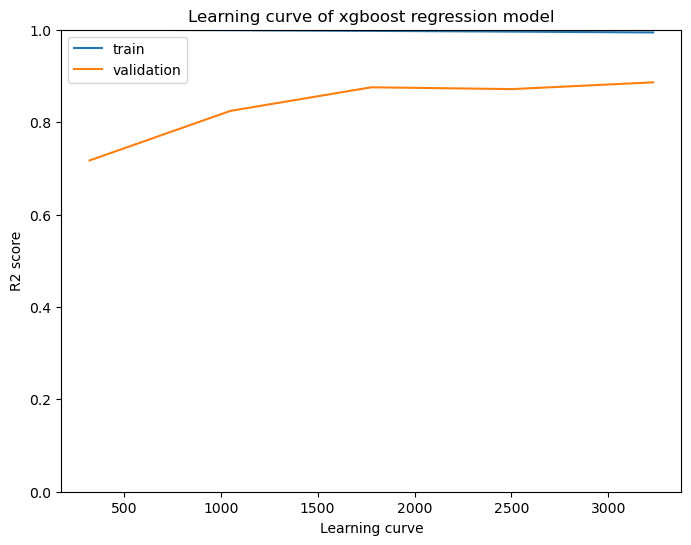

In [90]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
# Calculating the learning curve for the XGBoost regressor model
train_size, train_scores, test_scores = learning_curve(
                                        xgb,
                                        X_train,y_train,
                                        cv=5,
                                        scoring="r2",
                                        train_sizes=np.linspace(0.1,1,5))

# calculating the mean of validation and train data
train_mean_xg = train_scores.mean(axis=1)
test_mean_xg = test_scores.mean(axis=1)

# Plotting the learning curve for  train and validation data
plt.subplots(figsize=(8,6))
plt.plot(train_sizes, train_mean_xg, label="train")
plt.plot(train_sizes, test_mean_xg, label="validation")

plt.title("Learning curve of xgboost regression model")
plt.xlabel("Learning curve")
plt.ylabel("R2 score")
plt.ylim(0,1)
plt.legend(loc="best")

Getting the default values and parameters of XGBoost 

In [91]:
xgb.get_params()

{'objective': 'reg:squarederror',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': None,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

# Hyperparameter tuning: GridSearchCV for XGBoost regression (Validation set)

After the hyper parameter tuning, we can see that the model has done slightly better than before the grid search was done. The MSE score still remains on higher which suggests that there are outliers. Gamma value is also added to regularise and mitigate any overfitting risk.

In [92]:
# Adding the different parameters that needs to be checked
param_grid = {"objective":["reg:squarederror","reg:pseudohubererror"],
              "eta": [0.01,0.1,0.3],
              "max_depth": [3, 5, 7, 10],
              "min_child_weight": [1, 3, 5,30],
              "learning_rate": [0.1,0.3],
              "gamma":[0.1,0.01,None]
             }  


# Creating a grid_search object with XGBoost regressor model 
grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=5, scoring="r2")
# Fitting the grid_search object onto the training data
grid_search.fit(X_train,y_train)

# Finding the best estimator model
best_mod_xgb = grid_search.best_estimator_

# Finding the best params 
best_params_xgb = grid_search.best_params_

# Making predictions on validation set of dataset
y_pred_hp_xgb = best_mod_xgb.predict(X_val)

# Finding the MAE, MSE and r2 on validation set based on best parameters
MAE_hp_xgb = mean_absolute_error(y_val,y_pred_hp_xgb)
MSE_hp_xgb = mean_squared_error(y_val,y_pred_hp_xgb)
r2_hp_xgb = r2_score(y_val,y_pred_hp_xgb)


print("Best parameters:",best_params_xgb)
print("Mean absolute error on validation set:", MAE_hp_xgb)
print("Mean square error on validation set:", MSE_hp_xgb)
print("r2 score of val set:", r2_hp_xgb)

Best parameters: {'eta': 0.01, 'gamma': 0.1, 'learning_rate': 0.3, 'max_depth': 5, 'min_child_weight': 5, 'objective': 'reg:squarederror'}
Mean absolute error on validation set: 75693.03255788326
Mean square error on validation set: 23735831798.754807
r2 score of val set: 0.8920805439631689


# Best parameter model for XGBoost regression (Test set)

Based on the above model, the a model is build with the best hyperparameters found from the grid search. The model performs really well on the train data and it performs well on unseen test data too. This shows that the model is not overfitting. This model has the highest r2 score and lowest MSE and MAE of all the models used so far.The DMatrix was not used here because the cross validation with DMatrix did not have r2 score. 

In [93]:
xg_test = XGBRegressor(objective='reg:squarederror', 
                       eta=0.01,
                       max_depth=5,
                       min_child_weight=5,
                       learning_rate=0.3,
                       gamma=0.1)
# Fitting the object onto training data
xg_test.fit(X_train, y_train)

# Making predictions on test set
y_pred_test_xg = xg_test.predict(X_test)

# Making predictions on train set to check for overfitting
y_pred_train_xg = xg_test.predict(X_train)

# Finding MSE, MAE, r2 score of the test set
MAE_test_xgb = mean_absolute_error(y_test,y_pred_test_xg)
MSE_test_xgb = mean_squared_error(y_test, y_pred_test_xg)
r2_test_xgb = r2_score(y_test, y_pred_test_xg)
r2_train_xgb = r2_score(y_train, y_pred_train_xg)
RMSE_test_xgb = np.sqrt(MSE_test_xgb)


# Finding cv r2 score of train data in 5 folds
cv_r2_xg = cross_val_score(xg_test, X_train, y_train, cv=5, scoring ="r2")
cv_mean_xgb =cv_r2_xg.mean()

print("Mean absolute error on test data:", MAE_test_xgb)
print("Mean squared error on test data:", MSE_test_xgb)
print("r2 score on test data:",r2_test_xgb)
print("r2 score on train data:",r2_train_xgb)
print("cross validation r2 score on train data:", cv_mean_xgb)
print("RMSE score on test data", RMSE_test_xgb)

Mean absolute error on test data: 71844.13020543336
Mean squared error on test data: 15536806863.811096
r2 score on test data: 0.9312021129558153
r2 score on train data: 0.9847309488768824
cross validation r2 score on train data: 0.8876021491511852
RMSE score on test data 124646.72825153133


As seen in the below graph, most of the values are now closer to the red line which indicates the predictions are closer to the predicted value.

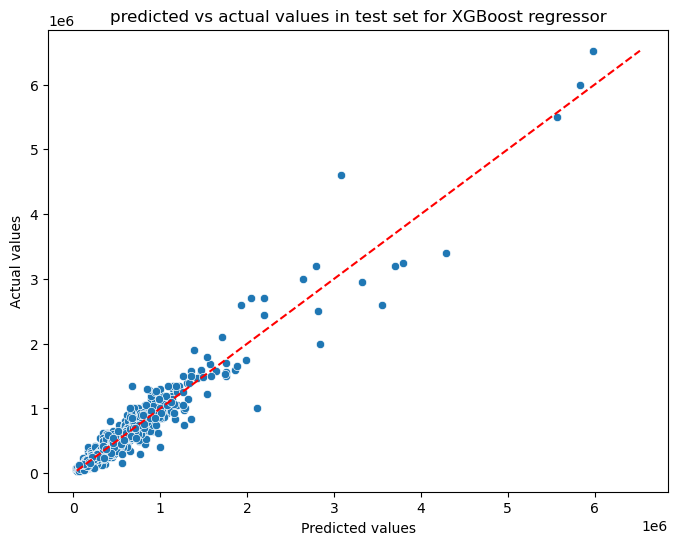

In [94]:
# Plotting the scatter plot with predicted vs actual values
plt.figure(figsize=(8,6))
sns.scatterplot(y=y_test, x=y_pred_test_xg)
plt.plot([min(y_test), max(y_test)],[min(y_test),max(y_test)],color="red", linestyle="--")

# Adding labels and title 
plt.xlabel("Predicted values")
plt.ylabel("Actual values")
plt.title("predicted vs actual values in test set for XGBoost regressor")
plt.show()

The residual seems to be closer to the line when the selling price is less. As the value increase, the points move away from the y=0 line. 

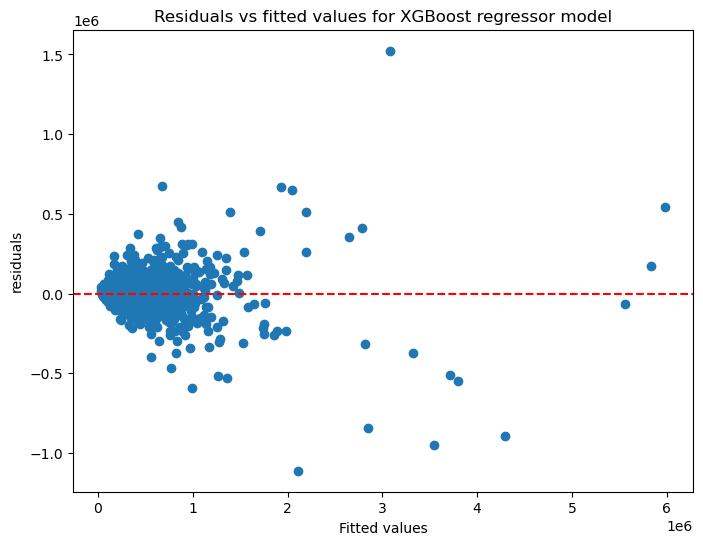

In [95]:
# Finding the residual values of validation set
residuals_xg = y_test-y_pred_test_xg
# Plotting the scatter plot 
plt.figure(figsize=(8,6))
plt.scatter(y_pred_test_xg, residuals_xg)
# Plotting the y=0 line
plt.axhline(y=0, color ="red", linestyle="--")

# Labelling and adding title to graph
plt.xlabel("Fitted values")
plt.ylabel("residuals")
plt.title("Residuals vs fitted values for XGBoost regressor model")
plt.show()

Finding the values above 4500000 and their predicted value so as to see which value is the most deviated one 

In [96]:
y_test[y_test>4500000]

367     5500000
4165    6523000
6148    4600000
983     6000000
Name: selling_price, dtype: int64

checking the predicted values and we see that the value which has most variance from actual value is 4600000. The predicted value for this is 3076923.   

In [97]:
y_pred_test_xg[y_test==4600000]

array([3076923.], dtype=float32)

Changing the value of prediction for the point furthest away from the line to its actual value to see the impact on MSE. We can see that MSE reduced drastically from 1.5e10 to 1.3e10, this shows the impact of deviation of predicted value from the actaul value as the selling prices are not normalised. The min selling price min is 29999 and max is 7.2e6 and the mean is 5.1e5. The RMSe score on test data is 1.2e5, even though it seems like a big value, but it is less than the mean of the data suggesting that the model is not performing badly.

In [98]:
y_pred_test_xg[y_test==4600000] = 4600000

In [99]:
MSE_sample_xgb = mean_squared_error(y_test, y_pred_test_xg)
print("Mean squared error on test data:", MSE_sample_xgb)

Mean squared error on test data: 13814636449.60991


# Comparison of models

All the four models(Linear regresssion, KNN regression, Random forest regression, XGBoost regression) used above will be compared. First a dataframe of all the values is be made to plot the values.

In [100]:
r2_score_df = pd.DataFrame({
    "models":["linear regression",
              "knn_regression",
              "random forest regression",
              "XGBoost regression"],
    "r2_before":[r2_lr,
              r2_knn,
              r2_rf,
              r2_xgb],
    "r2_after":[r2_hp_lr,
                r2_hp_knn,
                r2_hp_rf,
                r2_hp_xgb],                            
    "r2_test":[r2_test_lr,
              r2_test_knn,
              r2_test_rf,
              r2_test_xgb],
    "r2_train":[r2_train_lr,
               r2_train_knn,
               r2_train_rf,
               r2_train_xgb],
    "cv r2":[cv_mean_lr,
            cv_mean_knn,
            cv_mean_rf,
            cv_mean_xgb]})

r2 score table showing r2 square of all four models 

In [101]:
r2_score_df 

,models,r2_before,r2_after,r2_test,r2_train,cv r2
0,linear regression,0.587355,0.587355,0.572338,0.608892,0.600466
1,knn_regression,0.750036,0.766180,0.794199,0.884700,0.652408
2,random forest regression,0.865286,0.882962,0.899630,0.980519,0.886489
3,XGBoost regression,0.881114,0.892081,0.931202,0.984731,0.887602


Plotting the r2 scores between test and train data. The random forest regression and XGBoost models have performed well with this dataset.

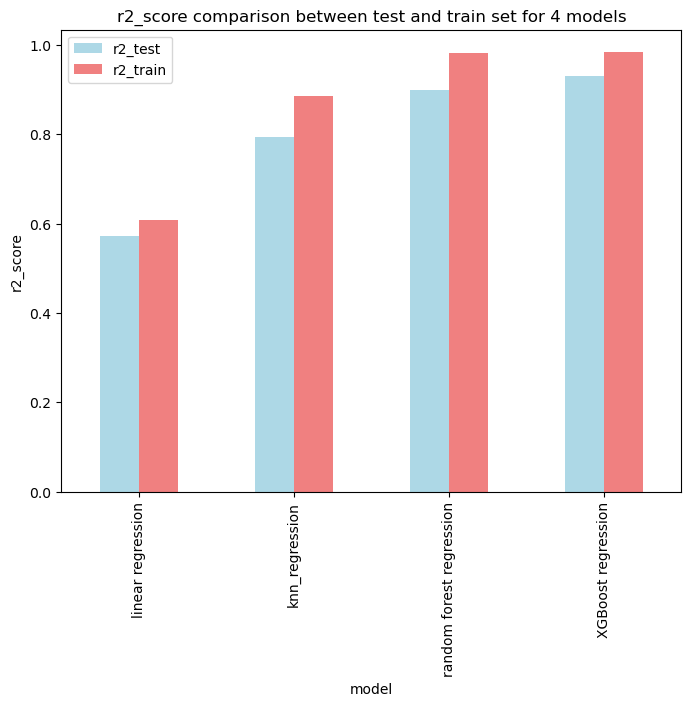

In [102]:
#plotting the r2_test and r2_train
fig, ax = plt.subplots(figsize=(8,6))
colours = ["lightblue","lightcoral"]
r2_score_df[["r2_test", "r2_train"]].plot(kind="bar",ax=ax, color=colours)

# Setting labels and title 
ax.set_xticklabels(r2_score_df["models"])
ax.set_xlabel("model")
ax.set_ylabel("r2_score")
ax.set_title("r2_score comparison between test and train set for 4 models")
plt.show()

R2 score before and after grid search

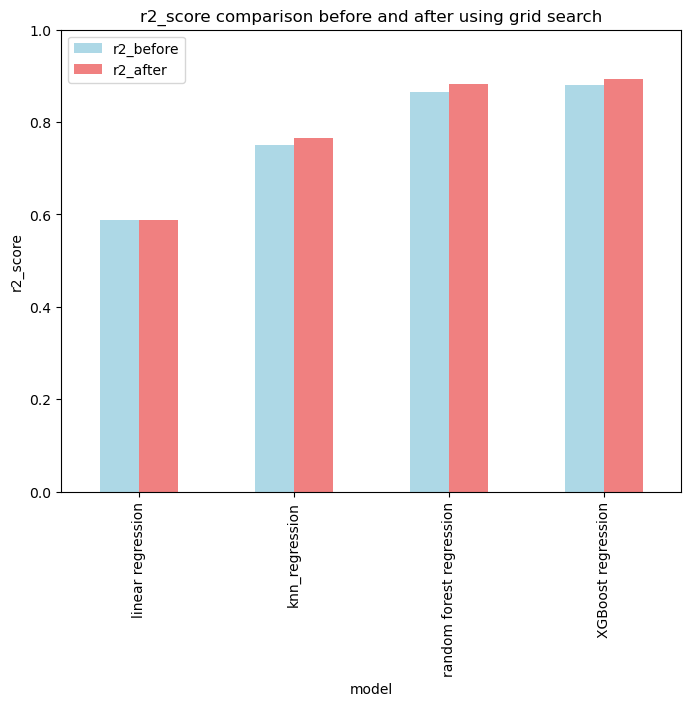

In [103]:
# Plotting the r2_test and r2_train
fig, ax = plt.subplots(figsize=(8,6))
r2_score_df[["r2_before","r2_after"]].plot(kind="bar", ax=ax,color =colours)

# Settimg labels and title
ax.set_xticklabels(r2_score_df["models"])
ax.set_xlabel("model")
ax.set_ylabel("r2_score")
ax.set_title("r2_score comparison before and after using grid search")
plt.ylim(0,1)
plt.show()

Making a table of all MSE scores of all four models on test set

In [104]:
mse_score_df = pd.DataFrame({
    "models":["linear regression",
             "knn regression",
             "random forest regression",
             "XGBoost regression"],
    "mse_test":[MSE_test_lr,
               MSE_test_knn,
               MSE_test_rf,
               MSE_test_xgb]})

Checking the dataframe of the MSE scores of test set

In [105]:
mse_score_df

,models,mse_test
0,linear regression,9.658012e+10
1,knn regression,4.647647e+10
2,random forest regression,2.266678e+10
3,XGBoost regression,1.553681e+10


Plotting graph for MSE for all the models. From the graph, we can see that the linear regression has the highest MSE and the XGBoost has the least MSE. With each model the MSE has reduced significantly.

Text(0.5, 1.0, 'MSE scores on test set')

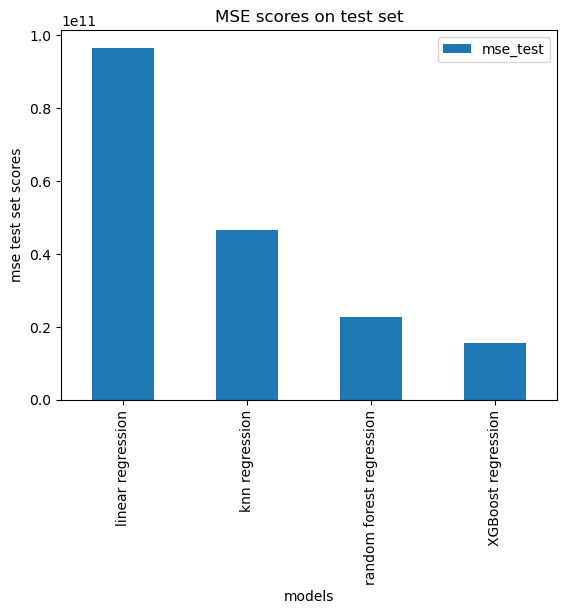

In [106]:
mse_score_df.plot.bar(x="models", y="mse_test")
plt.ylabel("mse test set scores")
plt.title("MSE scores on test set")

Making a table of MAE scores on test set

In [107]:
mae_score_df = pd.DataFrame({
    "models":["linear regression",
              "knn regression",
              "random forest regression",
              "xgb_regression"],
    "mae_test":[MAE_test_lr,
               MAE_test_knn,
               MAE_test_rf,
               MAE_test_xgb]})

Checking the dataframe of mae_score_df

In [108]:
mae_score_df

,models,mae_test
0,linear regression,170034.695583
1,knn regression,98973.607028
2,random forest regression,75760.365659
3,xgb_regression,71844.130205


The MAE score has improved from linear regression. The mae score appears to be quite similar for both xgboost and random forest regression mdoels

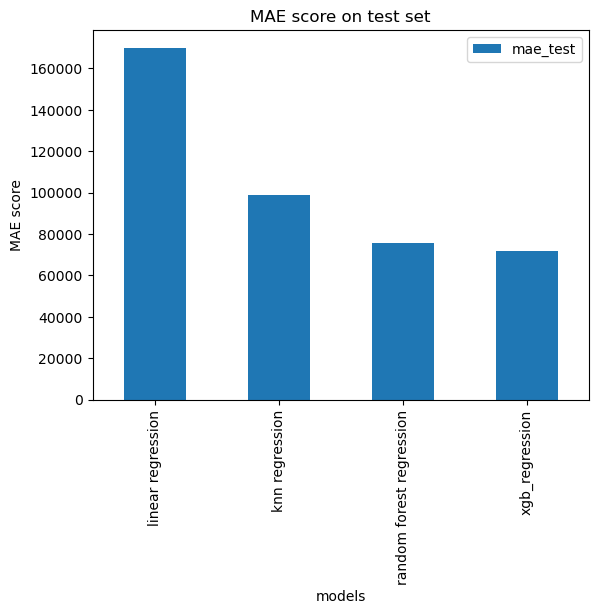

In [109]:
mae_score_df.plot.bar(x="models", y="mae_test")
plt.ylabel("MAE score")
plt.title("MAE score on test set")
plt.show()

The histogram for residuals of test set for all four models are plotted to compare below. With linear regression model, the maximum number values which are further away from the 0 point on x axis are towards the right. This shows these points skewed towards the right are values with predicted value less than the actual value. The model had underpredicted these values. In knn the biggest difference between the actual and predicted value is  towards the left side of the graph. This value was overpredicted.  In random forest and xgboost regression models the value furthest away from actual value was towards the right and these values were underpredicted. 

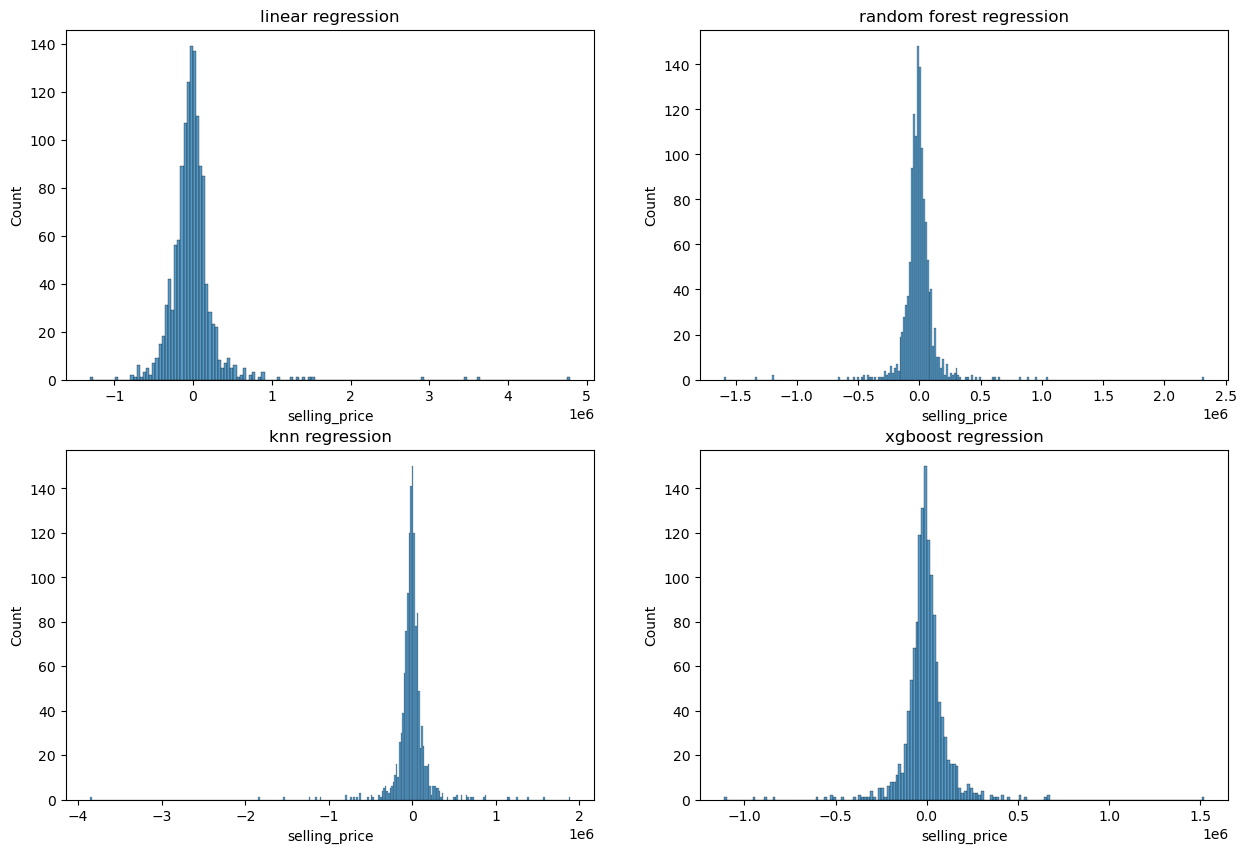

In [110]:
# Plotting the residual histogram for all the models
fig, axs = plt.subplots(2, 2, figsize=(15, 10))
sns.histplot(residuals_lr,ax=axs[0, 0])
sns.histplot(residuals_knn,ax=axs[1, 0])
sns.histplot(residuals_rf,ax=axs[0, 1])
sns.histplot(residuals_xg,ax=axs[1, 1])

# Adding labels and titles to the graph
axs[0,0].set_title("linear regression")
axs[1,0].set_title("knn regression")
axs[0,1].set_title("random forest regression")
axs[1,1].set_title("xgboost regression")
plt.show()